In [34]:
#下面这行代码，是为了把自己编写的代码文件当作一共模块导入，这里是把Utilities文件夹中的plotting.py文件当作python的模块导入，对应的是下面的from plotting import newfig, savefig。路径要随着不同设备的系统做相应的修改
import sys #导入sys模块。sys模块提供了一些变量和函数，用于与 Python解释器进行交互和访问。例如，sys.path 是一个 Python 在导入模块时会查找的路径列表，sys.argv 是一个包含命令行参数的列表，sys.exit() 函数可以用于退出 Python 程序。导入 sys 模块后，你就可以在你的程序中使用这些变量和函数了。
# sys.path.insert(0, '../../../Utilities/') #在 Python的sys.path列表中插入一个新的路径。sys.path是一个 Python 在导入模块时会查找的路径列表。新的路径'../../Utilities/'相对于当前脚本的路径。当你尝试导入一个模块时，Python 会在 sys.path 列表中的路径下查找这个模块。通过在列表开始位置插入一个路径，你可以让 Python 优先在这个路径下查找模块。这在你需要导入自定义模块或者不在 Python 标准库中的模块时非常有用。

import torch
#collections是python一个内置模块，提供了一些有用的数据结构
from collections import OrderedDict  #这个类是字典dict的一个子类，用于创建有序的字典。普通字典中元素顺序是无序的，在OrderedDict中元素的顺序是有序的，元素的顺序是按照它们被添加到字典中的顺序决定的。

from pyDOE import lhs #`pyDOE`是一个Python库，用于设计实验。它提供了一些函数来生成各种设计，如因子设计、拉丁超立方设计等。`lhs`是库中的一个函数，全名为"Latin Hypercube Sampling"，拉丁超立方采样。这是一种统计方法，用于生成一个近似均匀分布的多维样本点集。它在参数空间中生成一个非常均匀的样本，这对于高维数值优化问题非常有用，因为它可以更好地覆盖参数空间。
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #导入了scipy库中的io模块。scipy.io模块包含了一些用于文件输入/输出的函数，例如读取和写入.mat文件（MATLAB格式）
from scipy.interpolate import griddata #`scipy.interpolate`是`scipy`库中的一个模块，提供了许多插值工具，用于在给定的离散数据点之间进行插值和拟合。`griddata`是这个模块中的一个函数，用于在无规则的数据点上进行插值。

import random

import skopt #用于优化问题的库，特别是机器学习中的超参数优化
from distutils.version import LooseVersion #distutils是Python的一个标准库，用于构建和安装Python包。LooseVersion是一个类，用于比较版本号


# from plotting_torch import newfig, savefig #从自定义的plotting_torch.py文件中导入了newfig和savefig函数。这两个函数用于创建和保存图形。这两个函数的定义在plotting_torch.py文件中

from mpl_toolkits.axes_grid1 import make_axes_locatable #`mpl_toolkits.axes_grid1`是`matplotlib`库的一个模块，提供了一些高级的工具来控制matplotlib图形中的坐标轴和颜色条。`make_axes_locatable`是模块中的一个函数，用于创建一个可分割的坐标轴。可以在这个坐标轴的四个方向（上、下、左、右）添加新的坐标轴或颜色条。
import matplotlib.gridspec as gridspec #是`matplotlib`库的一个模块，用于创建一个网格布局来放置子图。在`matplotlib`中可以创建一个或多个子图（subplot），每个子图都有自己的坐标轴，并可以在其中绘制图形。`gridspec`模块提供了一个灵活的方式来创建和放置子图。
import time #一个内置模块，用于处理时间相关的操作。


from tqdm import tqdm #一个快速，可扩展的python进度条库，可以在python长循环中添加一个进度提示信息，用户只需要封装任意的迭代器tqdm(iterator)。



from sklearn.cluster import KMeans #sklearn是一个广泛使用的机器学习库，提供了各种算法和工具用于数据挖掘和分析。Kmeans是聚类算法，用于将数据分成预先指定数量的簇
import faiss #一种高效的相似性搜索和密集向量聚类库，适用于在大规模数据中进行高维向量的搜索和聚类操作
#faiss的安装方法：conda install -c conda-forge faiss-gpu


In [35]:
#定义采样函数，目的是采用sampler方法，生成n_samples个在指定空间内的准随机样本，这里space为二维的，因此每个样本都是一个二维点，即n_samples*2的数据点

#共有6种采样器，分别是LHS、Halton、Hammersley、Sobol、Grid和Random，均为均匀采样方法

def caiyang(n_samples, sampler): #接受两个参数，n_samples是样本数量，sampler是采样器名称，是一个字符串
    space = [(-1.0, 1.0), (0.0, 1.0)] #指定样本生成的空间，一个二维空间，第一个维度是-1到1，第二个维度是0到1

    #根据sampler的不同，选择不同的采样器，返回的sampler是一个采样器对象
    if sampler == "LHS": #如果采样器是LHS（拉丁超采样，每个维度都被均匀划分为等量区间，每个样本都是从每个维度的一个区间中随机选取的）
        sampler = skopt.sampler.Lhs(lhs_type="centered", criterion="maximin", iterations=1000) #第一个参数表示如何从每个区间选取样本，这里表示从每个区间的中心选取样本；第二个参数表示如何划分区间，这里表示尽可能使样本之间的最小距离最大；第三个表示通过优化过程得到样本量的迭代次数（即会尝试1000种不同的样本配置，并最终选择质量最好的那个）
    elif sampler == "Halton": #Halton序列是一种低差异序列，用于在高维空间中生成点
        sampler = skopt.sampler.Halton(min_skip=-1, max_skip=-1)  #两个参数用于控制序列的起始点，Halton序列可以通过跳过序列的前几个点来改变序列的七十点。两个参数分别制定了跳过点的最小和最大数量，这里-1表示不跳过任何点
    elif sampler == "Hammersley": #Hammersley序列是一种低差异序列，用于在高维空间中生成点
        sampler = skopt.sampler.Hammersly(min_skip=-1, max_skip=-1) #两个参数用于控制序列的起始点，Hammersley序列可以通过跳过序列的前几个点来改变序列的七十点。两个参数分别制定了跳过点的最小和最大数量，这里-1表示不跳过任何点
    elif sampler == "Sobol":
        # Remove the first point [0, 0, ...] and the second point [0.5, 0.5, ...], which are too special and may cause some error.
        # Sobol采样器的实现有一个问题，即生成的前两个样本点通常不是随机的而是固定的，Sobol序列的前两个点（[0, 0, ...]和[0.5, 0.5, ...]）在许多情况下都被认为是“特殊”的点，可能会对某些计算产生不利影响。因此设置跳过前两个点，而且skopt库在0.9版本号取消了max/min_skip参数，所以需要根据skopt的版本号来选择不同的参数
        if LooseVersion(skopt.__version__) < LooseVersion("0.9"): #先检查skopt的版本是否大于0.9,若小于
            sampler = skopt.sampler.Sobol(min_skip=2, max_skip=2, randomize=False) #则使用Sobol采样器，min_skip和max_skip表示跳过的点的数量，这里表示跳过前两个点，randomize表示是否随机化
        else: #若skopt的版本大于0.9
            sampler = skopt.sampler.Sobol(skip=0, randomize=False) #则使用Sobol采样器，skip表示跳过的点的数量，这里表示不跳过任何点，randomize表示是否随机化 
            return np.array(sampler.generate(space, n_samples + 2)[2:]) #生成n_samples+2个样本，然后返回除了前两个样本之外的所有样本，也就是返回n_samples个样本，每个样本都是一个二维点，且范围在指定的空间space里面
    elif sampler == "Grid":
        x_min, x_max = space[1]
        t_min, t_max = space[0]
        
        # 计算每个维度的网格大小
        x_grid_size = (x_max - x_min) / (n_samples // int(np.sqrt(n_samples)) - 1) # x维度上（纵轴），每行有10个点
        t_grid_size = (t_max - t_min) / int(np.sqrt(n_samples))  # 
        
        # 生成等距均匀网格采样点
        samples = []
        for i in range(n_samples // int(np.sqrt(n_samples))):
            for j in range(int(np.sqrt(n_samples))):
                # 计算每个网格单元的中心点
                x = x_min + i * x_grid_size
                t = t_min + j * t_grid_size
                samples.append([t, x])
        
        return np.array(samples)
    
    elif sampler == "Random":
        # 从space中提取出x_min, x_max, t_min, t_max
        x_min, x_max = space[1]
        t_min, t_max = space[0]

        # 生成x和t的随机数
        x = np.random.rand(n_samples, 1) * (x_max - x_min) + x_min
        t = np.random.rand(n_samples, 1) * (t_max - t_min) + t_min

        # 将x和t合并为一个(n_samples, 2)的数组
        samples = np.hstack((t, x))
        return samples #生成一个形状为(n_samples, 2)的随机数组



    return np.array(sampler.generate(space, n_samples)) #生成n_samples个样本，每个样本都是一个二维点，且范围在指定的空间space里面（n_samples*2）

In [36]:
class FaissKmeans: #定义一个名为FaissKmeans的类，用于执行基于Faiss库的K均值聚类
    def __init__(self, n_clusters=8, gpu=True, n_init=10, max_iter=300): #类的构造函数，接收四个参数：n_clusters（簇的数量）、gpu（是否使用GPU，默认为True）、n_init（初始化次数，默认为10）、max_iter（最大迭代次数，默认为300）
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.kmeans = None
        self.cluster_centers_ = None
        self.inertia_ = None
        self.gpu = gpu

    def fit(self, X): #fit方法，接受一个参数X（数据集），用于训练找到聚类中心
        #创建一个Faiss的Kmeans实例，传入数据集的维度（d，来自于输入参数X的列数/第二维度）、簇的数量（k，手动设置，默认为8）、最大迭代次数（niter，手动设置，默认为300）、初始化次数（nredo，手动设置，默认为10）和是否使用GPU
        self.kmeans = faiss.Kmeans(d=X.shape[1],
                                   k=self.n_clusters,
                                   niter=self.max_iter,
                                   nredo=self.n_init,
                                   gpu = self.gpu)
        self.kmeans.train(X.astype(np.float32)) #先将传入的数据集X转换为32位浮点数，然后用其来训练Kmeans模型
        self.cluster_centers_ = self.kmeans.centroids #获取训练好的Kmeans模型的中心，保存为cluster_centers_
        self.inertia_ = self.kmeans.obj[-1] #将训练后的最终惯性（或总距离平方和）存储在inertia_中

    def predict(self, X): #predict方法，接受一个参数X（数据集），用于使用训练好的中心来预测新数据点的聚类归属
        D, I = self.kmeans.index.search(X.astype(np.float32), 1) #使用Faiss的search方法对输入数据集X进行聚类预测，返回每个点到最近聚类中心的距离D和聚类中心的索引I
        return D, I #返回距离D和索引I
    




In [37]:
X = caiyang(1000, "LHS")

# 初始化FaissKmeans类
kmeans = FaissKmeans(n_clusters=100, gpu=True)  # 假设我们想要将数据聚成1000类，使用GPU

# 训练模型
kmeans.fit(X)

# 打印聚类中心
print("聚类中心:\n", kmeans.cluster_centers_)

# 如果需要，对数据进行聚类预测
D, I = kmeans.predict(X)
print("每个点的聚类索引:\n", I.flatten())  # 使用flatten()是为了将索引数组转换为一维数组，便于阅读

聚类中心:
 [[ 0.45066667  0.6461667 ]
 [-0.5662      0.5734334 ]
 [ 0.8755001   0.74033344]
 [ 0.483       0.9525    ]
 [ 0.91966665  0.6174167 ]
 [-0.6424545   0.04059091]
 [-0.3711429   0.3479286 ]
 [ 0.9182      0.2309    ]
 [-0.7614      0.92390007]
 [ 0.41700003  0.34592858]
 [ 0.3447778   0.22405556]
 [-0.32375     0.74587506]
 [ 0.28400004  0.38750002]
 [ 0.64966667  0.28316668]
 [-0.8967777   0.7680556 ]
 [ 0.5114      0.08576667]
 [ 0.33042857  0.9609286 ]
 [-0.7699091   0.65904546]
 [ 0.9682      0.78599995]
 [-0.46780005  0.8400001 ]
 [-0.44245458  0.09268181]
 [-0.08199999  0.6497    ]
 [-0.50211114  0.69305557]
 [-0.71500003  0.5568571 ]
 [-0.29188886  0.06894445]
 [-0.37420002  0.9315001 ]
 [-0.68700004  0.38892856]
 [-0.175       0.520375  ]
 [-0.1422      0.15163334]
 [ 0.18546155  0.2797308 ]
 [ 0.73099995  0.39900002]
 [-0.94233334  0.8643889 ]
 [ 0.69769996  0.9353002 ]
 [ 0.7255      0.7593334 ]
 [ 0.09142859  0.6421429 ]
 [-0.71376926  0.19065385]
 [ 0.00316667  0.2351

In [38]:
print(I.flatten())
print(len(I.flatten()))

[57 76 10 43 90 29  1 65 68 89 48 53 36 35 73 42 61 57  7 51 42 61 30 59
 41 95 20 27 10 77 24 74 36 87 78 62 56 86 59 91 77 88 35 20 68 29 17 17
  2 71 40 34 66 76 93  7 13 65 28  6 26 48 65 25 63 78 19 32 70  7 97 81
 26 36 52 51  7 70 70 35 32 31  5 32 60 63 23 21 78 34 50 29 14 24 40 16
 75 95 12 28 77 22 71 14 91 50 85  4 92 20  6 48 10 49 49 36 94 72 78 60
 53 72 60 27 14 92 47 71 38  4 15 45 63 40 25 95  2 23 78 74 24  4 17 98
 21 76 67 48  3 32 85 27 55 49 39  4 48 67 61 74 55 18 32  2 56  6 41 56
 85 23 10 73 39 25 20 32 26 88 46 19 32 32 69  1 60 33 66 40 81 23  9  5
 70 64 52 13 73 25 18 12 25 93 70 74 47 17 18 27 27 60 63 55 93 44  6 79
 69  9 76 24 30 95 69 26 67 80 30 17 79 21 11 77 74 16 44 39 87 77 28 78
 81 33 97 15 28 19 56  2 90 78 75 70 46 21 99 35 98 63 39 89 15  1 25  6
 27  1  5  0 53 69 71 96 39 16 96 16 14 84 41 70 40 70 22 84  2 26 62 64
 69 12 78 96 98 28 31 45 56 56 98 33 88 36 42 42 24 31 13 29  4 47 37 33
 29  9 62 75 23 73 65 39 39 78 40 70 74  6  4 72 64

In [39]:
# 假设I是通过kmeans.predict(X)得到的簇索引数组
I_flattened = I.flatten()  # 确保I是一维数组

clusters_points = {}  # 用于存储每个簇的点

# 遍历所有独特的簇索引
for cluster_index in np.unique(I_flattened):
    # 找出属于当前簇的所有点的索引
    points_indices = np.where(I_flattened == cluster_index)[0]
    # 根据索引从原始数据集X中获取这些点
    clusters_points[cluster_index] = X[points_indices]

# 现在clusters_points字典包含了每个簇索引及其对应的所有点

In [43]:
print(clusters_points[5])
print(len(clusters_points))

print(X.shape)

[[-0.549   0.0035]
 [-0.707   0.0525]
 [-0.593   0.0145]
 [-0.629   0.0725]
 [-0.669   0.0625]
 [-0.693   0.0165]
 [-0.681   0.0085]
 [-0.665   0.0955]
 [-0.607   0.0445]
 [-0.659   0.0045]
 [-0.615   0.0715]]
100
(1000, 2)


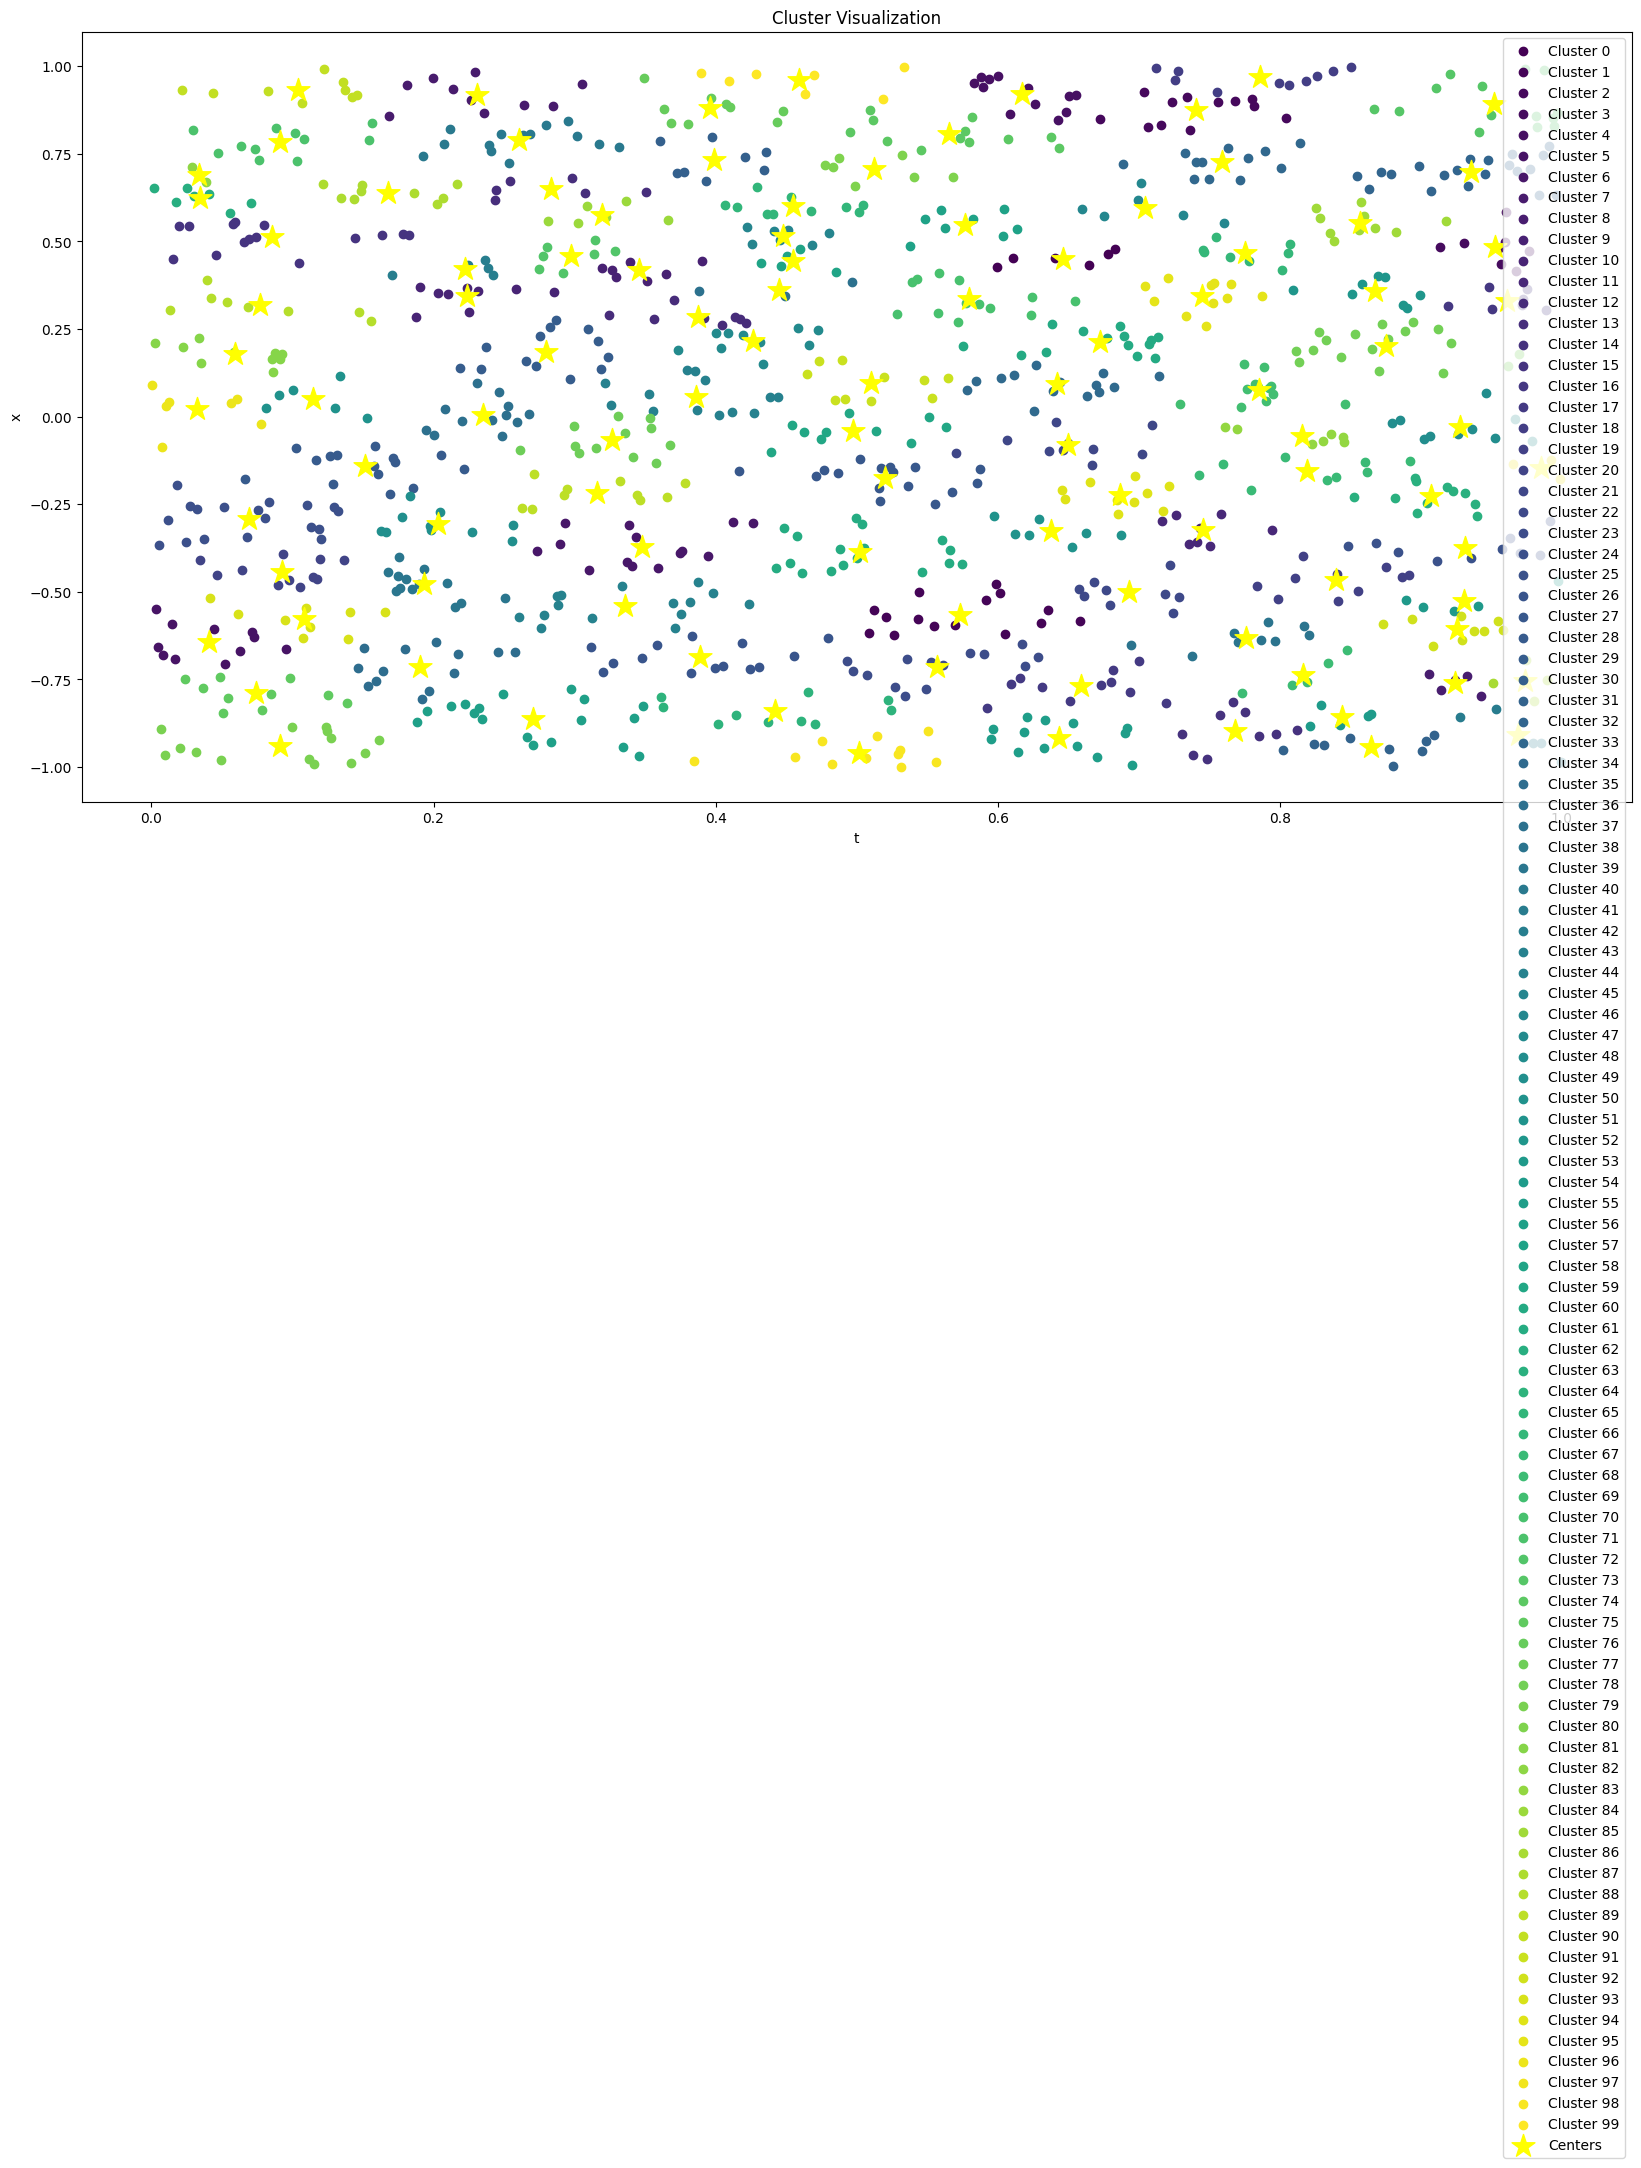

In [41]:
from matplotlib import cm

# 设置图形大小
plt.figure(figsize=(20, 10))

# 绘制每个聚类的点
# 使用颜色图生成颜色，这里使用viridis，但你可以选择其他的颜色图
colors = cm.viridis(np.linspace(0, 1, 100)) # 为每个聚类指定颜色
for i in range(100):  # 假设有99个聚类
    plt.scatter(X[I.flatten() == i, 1], X[I.flatten() == i, 0], color=colors[i], label=f'Cluster {i}') #绘制散点图，选择属于第i个聚类的点，颜色为colors[i]，标签为Cluster i

# 绘制聚类中心
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=300, c='yellow', marker='*', label='Centers')

plt.title('Cluster Visualization')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.show()

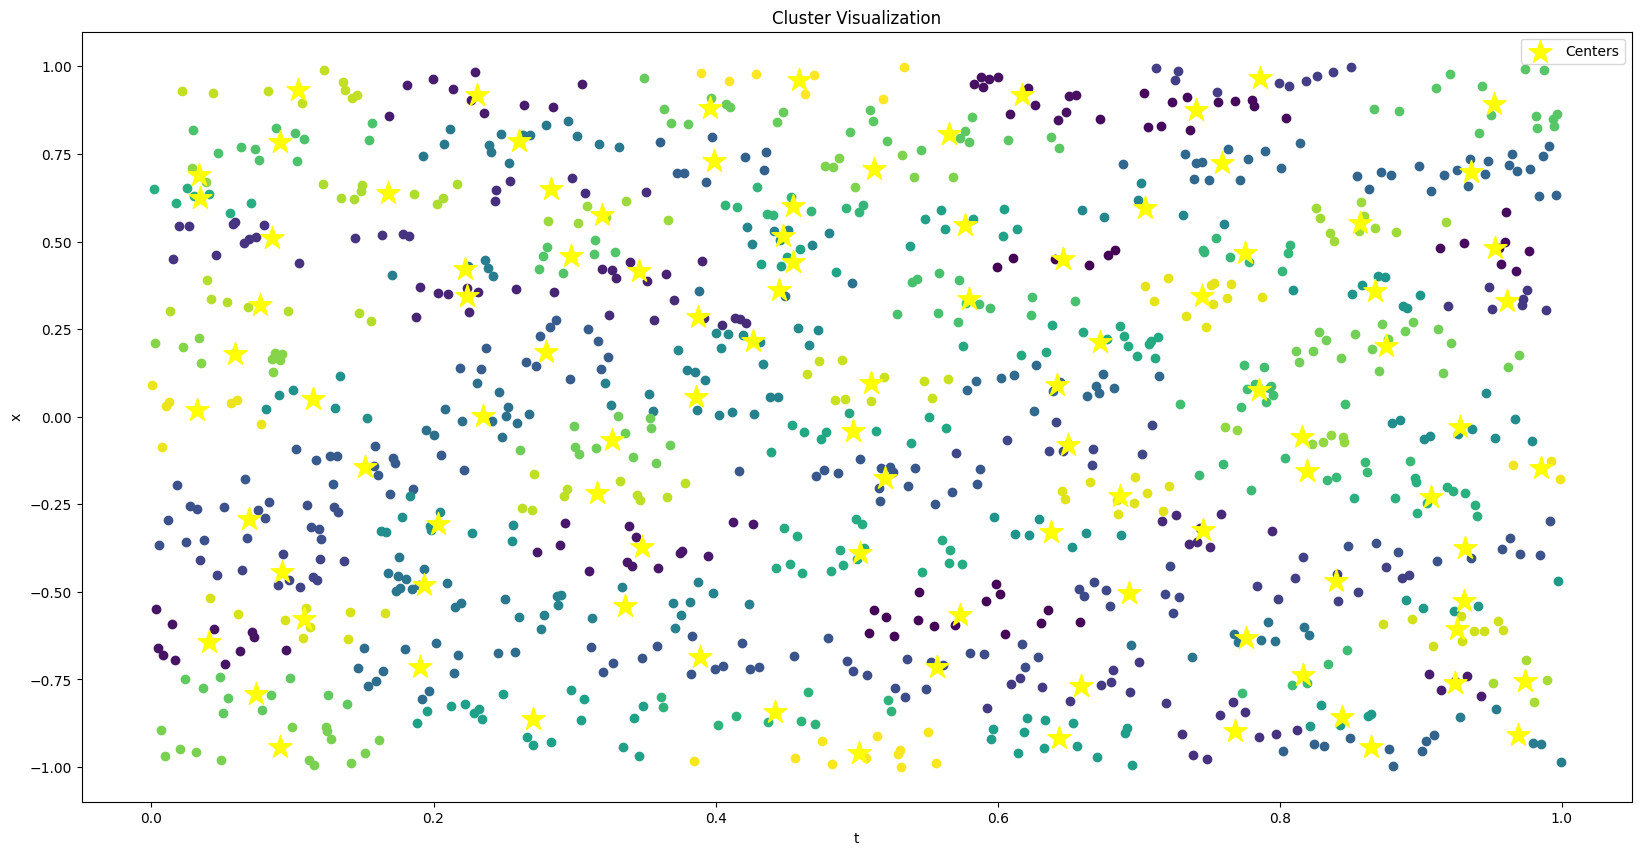

In [42]:
from matplotlib import cm

# 设置图形大小
plt.figure(figsize=(20, 10))

# 绘制每个聚类的点
# 使用颜色图生成颜色，这里使用viridis，但你可以选择其他的颜色图
colors = cm.viridis(np.linspace(0, 1, 100)) # 为每个聚类指定颜色
for i in range(100):  # 假设有99个聚类
    plt.scatter(X[I.flatten() == i, 1], X[I.flatten() == i, 0], color=colors[i]) #绘制散点图，选择属于第i个聚类的点，颜色为colors[i]，标签为Cluster i

# 绘制聚类中心
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=300, c='yellow', marker='*', label='Centers')

plt.title('Cluster Visualization')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.show()